In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cftime
import scipy.stats as sps
from tqdm import tqdm

# Looking at ETo result data

<font color=red> <b> Adjust P to elevation! psl = at sea level but P in ETo-calc is at elev </b> </font> 
- data: CEH 50m-res dataset? 

In [2]:
# some definitions
var_datapath = "/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/{var}/day/latest/{var}_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc"
eto_fao_datapath = "/home/users/nelerey/data/PE/ETo-fao56/evpot-fao56_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc"
eto_fao_datapath_bug = "/home/users/nelerey/data/PE/ETo-fao56_with-U2-bug/evpot-fao56_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc"

In [5]:
varlist = ['hurs', 'rss', 'psl', 'rls', 'tas', 'tasmin', 'tasmax', ]
ds_inputvar = {}
for v in varlist:
    ds_inputvar[v] = xr.open_dataset(var_datapath.format(var=v))
    print('\n\n{}:\n'.format(v), ds_inputvar[v])
ds_eto = xr.open_dataset(eto_fao_datapath)
ds_eto_bug = xr.open_dataset(eto_fao_datapath_bug)



hurs:
 <xarray.Dataset>
Dimensions:                       (bnds: 2, ensemble_member: 1, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 3600)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:00:00
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05 ... 1.23e+06
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ... 7.62e+05
    ensemble_member_id            (ensemble_member) |S27 ...
    grid_latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int32 ...
    year                          (time) int32 ...
    yyyymmdd                      (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    hurs                         

In [4]:
ds_eto

<xarray.Dataset>
Dimensions:                  (ensemble_member: 1, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 3600)
Coordinates:
  * ensemble_member          (ensemble_member) int32 1
  * time                     (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:00:00
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... 1.23e+06
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7.62e+05
    ensemble_member_id       (ensemble_member) |S27 ...
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number             (time) int32 ...
    year                     (time) int32 ...
    yyyymmdd                 (time) |S64 ...
Data variables:
    evpot-fao56              (ensemble_member, time, projection_y_coordinate, projection_x_coordinate) float32 ...

Running python tool from notebook, yay efficiency?

# Fitting distributions
First let's look at the histogram and then fit distributions

In [5]:
ds_eto_EA = ds_eto['evpot-fao56'].sel(projection_x_coordinate= 606000,
                                          projection_y_coordinate= 306000)
ds_eto_NS = ds_eto['evpot-fao56'].sel(projection_x_coordinate= 294000,
                                          projection_y_coordinate= 942000)

In [6]:
EA_hist = np.histogram(ds_eto_EA.values, bins=50)
EA_hist

(array([  5,  20,  44, 100, 224, 186, 167, 167, 160, 164, 137, 124, 138,
        125, 117,  94,  95, 103,  85,  85, 111,  73, 110,  76,  85,  83,
         67,  81,  63,  77,  68,  49,  54,  60,  28,  30,  38,  30,  16,
         22,  11,  10,   6,   5,   2,   1,   1,   1,   1,   1]),
 array([-0.36      , -0.2476    , -0.13520001, -0.0228    ,  0.0896    ,
         0.202     ,  0.31440002,  0.4268    ,  0.5392    ,  0.6516    ,
         0.76400006,  0.87640005,  0.98880005,  1.1012001 ,  1.2136    ,
         1.3260001 ,  1.4384    ,  1.5508001 ,  1.6632    ,  1.7756001 ,
         1.8880001 ,  2.0004    ,  2.1128001 ,  2.2252002 ,  2.3376    ,
         2.45      ,  2.5624    ,  2.6748002 ,  2.7872002 ,  2.8996    ,
         3.012     ,  3.1244001 ,  3.2368002 ,  3.3492002 ,  3.4616    ,
         3.5740001 ,  3.6864002 ,  3.7988002 ,  3.9112003 ,  4.0236    ,
         4.136     ,  4.2484    ,  4.3608003 ,  4.4732003 ,  4.5856004 ,
         4.6980004 ,  4.8104    ,  4.9228    ,  5.0352    ,

In [ ]:
plt.bar((EA_hist[1][1:]+EA_hist[1][:-1])/2, EA_hist[0])

## monthly

In [8]:
monthly_EA = [l[1] for l in list(ds_eto_EA.groupby('time.month'))]

In [ ]:
f,axes = plt.subplots(4,3,figsize=(12,9), sharex=True, sharey=True)
faxes = axes.flatten()
for i, ds in enumerate(monthly_EA):
    month_i_hist = np.histogram(ds.values, bins=100)
    faxes[i].bar((month_i_hist[1][1:]+month_i_hist[1][:-1])/2, month_i_hist[0])

From the figure above:
- what are t

## spatial

In [ ]:
ds_eto['evpot-fao56'].mean(dim='time').plot()

In [ ]:
ds_eto_bug['evpot-fao56'].mean(dim='time').plot()

In [ ]:
ds_eto_bug['evpot-fao56'].max(dim='time').plot()

In [ ]:
ds_eto_bug['evpot-fao56'].min(dim='time').plot()

In [ ]:
ds_eto_bug['evpot-fao56'].median(dim='time').plot()

In [ ]:
diff = ds_eto_bug['evpot-fao56'].mean(dim='time') - ds_eto['evpot-fao56'].mean(dim='time')
diff.plot()

## quick trend check

In [2]:
import glob 

In [3]:
var_datapath_100 = "/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/{var}/day/latest/{var}_rcp85_land-rcm_uk_12km_01_day_????1201-????1130.nc"
eto_fao_datapath_100 = glob.glob("/home/users/nelerey/data/PE/ETo-fao56/evpot-fao56_rcp85_land-rcm_uk_12km_01_day_????1201-????1130.nc")
varlist = ['hurs', 'rss', 'psl', 'rls', 'tas', 'tasmin', 'tasmax', 'sfcWind']
ds_inputvar_100 = {}
for v in varlist:
    ds_inputvar_100[v] = xr.open_mfdataset(glob.glob(var_datapath_100.format(var=v)))
ds_eto_100 = xr.open_mfdataset(eto_fao_datapath_100)

In [16]:
ds_eto_EA_100 = ds_eto_100['evpot-fao56'].sel(projection_x_coordinate= 606000,
                                      projection_y_coordinate= 306000)
ds_eto_NS_100 = ds_eto_100['evpot-fao56'].sel(projection_x_coordinate= 294000,
                                      projection_y_coordinate= 942000)
ds_inputvar_EA_100={}
for v in varlist:
    ds_inputvar_EA_100[v] = ds_inputvar_100[v][v].sel(projection_x_coordinate= 606000,
                                                   projection_y_coordinate= 306000)
    
ds_inputvar_NS_100={}
for v in varlist:
    ds_inputvar_NS_100[v] = ds_inputvar_100[v][v].sel(projection_x_coordinate= 294000,
                                                   projection_y_coordinate= 942000)


In [5]:
ds_eto_mean_100 = ds_eto_100['evpot-fao56'].mean(["projection_x_coordinate",
                                                "projection_y_coordinate"])
ds_inputvar_mean_100={}
for v in varlist:
    ds_inputvar_mean_100[v] = ds_inputvar_100[v][v].mean(["projection_x_coordinate",
                                                          "projection_y_coordinate"])


In [ ]:
# for the East Anglia pixel
plt.plot(ds_eto_EA_100.isel(ensemble_member=0));

In [14]:
ds_eto_EA.groupby('time.year').sum(dim='time')

<xarray.DataArray 'evpot-fao56' (ensemble_member: 1, year: 11)>
array([[ 11.200001, 549.33997 , 505.91    , 504.34003 , 520.02    ,
        569.64    , 534.22    , 546.57    , 574.53    , 507.88    ,
        541.22    ]], dtype=float32)
Coordinates:
  * ensemble_member          (ensemble_member) int32 1
    projection_y_coordinate  float64 3.06e+05
    projection_x_coordinate  float64 6.06e+05
    ensemble_member_id       (ensemble_member) |S27 ...
    grid_latitude            float64 ...
    grid_longitude           float64 ...
  * year                     (year) int64 1980 1981 1982 1983 ... 1988 1989 1990

In [ ]:
plt.plot(ds_eto_EA_100.groupby('time.year').sum(dim='time').isel(ensemble_member=0));
plt.plot(ds_eto_EA_100.groupby('time.year').mean(dim='time').isel(ensemble_member=0));

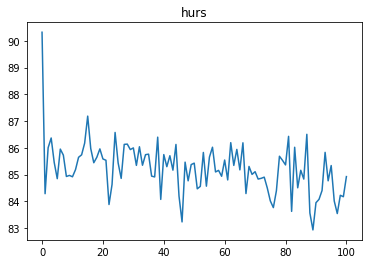

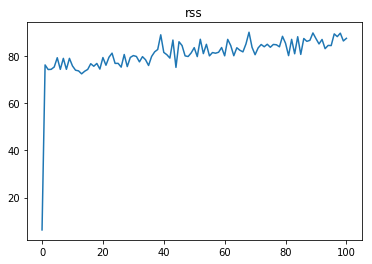

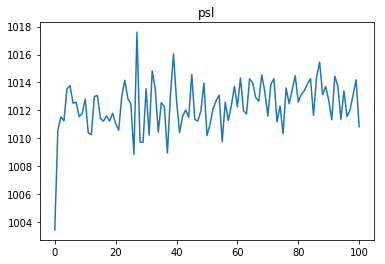

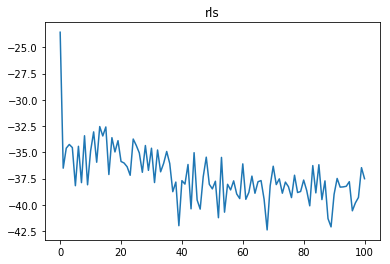

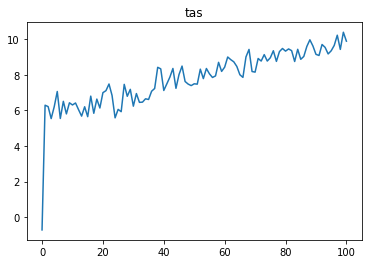

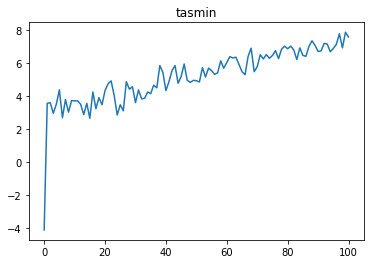

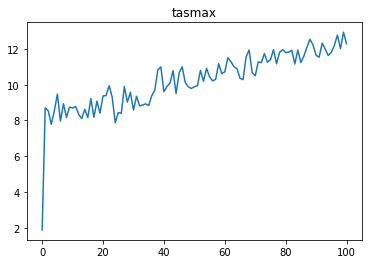

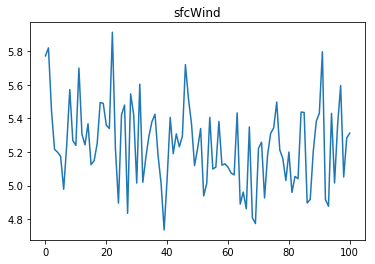

In [17]:
for v in varlist:
    f,ax = plt.subplots()
    plt.plot(ds_inputvar_NS_100[v].groupby('time.year').mean(dim='time').isel(ensemble_member=0));
    ax.set_title(v) 

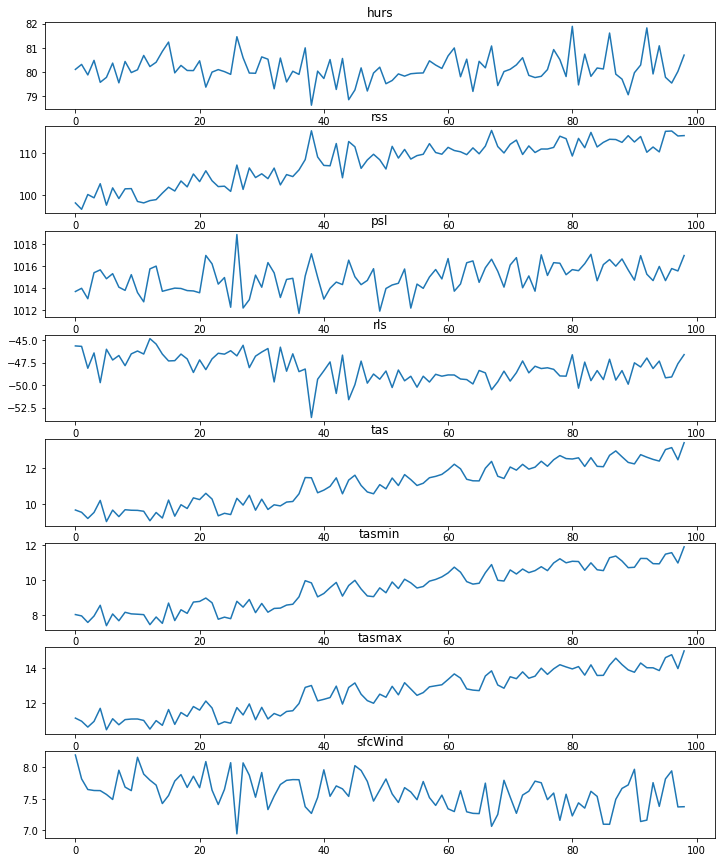

In [14]:
f, ax = plt.subplots(len(varlist), figsize=(12,15))
for j, v in enumerate(varlist):
    for i in [1]:        
        ax[j].plot(ds_inputvar_mean_100[v].sel(ensemble_member=i).sel(time=slice(cftime.Datetime360Day(1981, 1, 1), 
                                                                                 cftime.Datetime360Day(2079,12,30))
                                                                     ).groupby('time.year').mean(dim='time'));  # groupby('time.year').mean(dim='time')
        ax[j].set_title(v) 

In [ ]:
plt.plot(ds_eto_EA_100.groupby('time.year').sum(dim='time').isel(ensemble_member=0));

In [18]:
# shit, do we have nc-time-axis in this jaspy??
! conda list
# yes. but this old jaspy version contains xr v11 :( 

# packages in environment at /opt/jaspy:
#
# Name                    Version                   Build  Channel
_r-mutex                  1.0.0               anacondar_1    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
alabaster                 0.7.12                     py_0    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
arpack                    3.6.3           blas_openblash77d739c_2  [blas_openblas]  http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
asn1crypto                0.24.0                py37_1003    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
astroid                   2.1.0                 py37_1000    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
atk                       2.25.90              h05f3006_1    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
atomicwrites              1.2.1                      py_0    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.5.11
attrs                     18.2.0                     py_0    http://dist.ceda.ac.uk/jaspy/jaspy3.7/m3-4.

# fitting distributions to simulated PE
Bias correction preparation step. Distributions to test:
- beta
- norm
- weibull
- gamma
- rice

This fitting needs to be done for every month separately, as this is also how the BC is done. 

In [ ]:
ksvals_EA = {}
pvals_EA = {}
xd = np.linspace(-.5,4.5,1000)
f,axes = plt.subplots(4,3,figsize=(17,14), sharex=True, sharey=False)
faxes = axes.flatten()
distributions = [sps.beta, sps.norm, sps.gamma, sps.rice, sps.weibull_min]

for i,ds in tqdm(enumerate(monthly_EA)):
    x = ds.values[0]
    ksvals_monthi = {}
    pvals_monthi = {}
    faxes[i].hist(x, density=True, bins=30, label='orig')
    for spsdotwhat in distributions:
        shape_loc_scale = spsdotwhat.fit(x)
        # goodness of fit
        ksvals_monthi[spsdotwhat.name], pvals_monthi[spsdotwhat.name] = sps.kstest(x, spsdotwhat.name, args=shape_loc_scale)
        # make a pdf
        pdf = spsdotwhat.pdf(xd, *shape_loc_scale)
        # display
        faxes[i].plot(xd,pdf, label=spsdotwhat.name)
    ksvals_EA['month {}'.format(i+1)] = ksvals_monthi
    pvals_EA['month {}'.format(i+1)] = pvals_monthi

plt.legend()
plt.show()

In [ ]:
monthly_NS = [l[1] for l in list(ds_eto_NS.groupby('time.month'))]
ksvals_NS = {}
pvals_NS = {}
xd = np.linspace(-.5,4.5,1000)
f,axes = plt.subplots(4,3,figsize=(17,14), sharex=True, sharey=False)
faxes = axes.flatten()
distributions = [sps.beta, sps.norm, sps.gamma, sps.rice, sps.weibull_min]

for i,ds in tqdm(enumerate(monthly_NS)):
    x = ds.values[0]
    ksvals_monthi = {}
    pvals_monthi = {}
    faxes[i].hist(x, density=True, bins=30, label='orig')
    for spsdotwhat in distributions:
        shape_loc_scale = spsdotwhat.fit(x)
        # goodness of fit
        ksvals_monthi[spsdotwhat.name], pvals_monthi[spsdotwhat.name] = sps.kstest(x, spsdotwhat.name, args=shape_loc_scale)
        # make a pdf
        pdf = spsdotwhat.pdf(xd, *shape_loc_scale)
        # display
        faxes[i].plot(xd,pdf, label=spsdotwhat.name)
    ksvals_NS['month {}'.format(i+1)] = ksvals_monthi
    pvals_NS['month {}'.format(i+1)] = pvals_monthi

plt.legend()
plt.show()

In [ ]:
months = np.arange(1,13)
f,ax = plt.subplots(1,2,figsize=(18,8))
for spsdotwhat in distributions:
    ksvals_distr_EA = [ksvals_monthi[1][spsdotwhat.name] for ksvals_monthi in ksvals_EA.items()]
    ax[0].plot(months,ksvals_distr_EA, label=spsdotwhat.name)
    ksvals_distr_NS = [ksvals_monthi[1][spsdotwhat.name] for ksvals_monthi in ksvals_NS.items()]
    ax[1].plot(months,ksvals_distr_NS, label=spsdotwhat.name)
    print(spsdotwhat.name, ': ks statistic = mean {} in EA and {} in NS'.format(np.mean(ksvals_distr_EA), np.mean(ksvals_distr_NS)))
    print(spsdotwhat.name, ': ks statistic = max {} in EA and {} in NS'.format(np.max(ksvals_distr_EA), np.max(ksvals_distr_NS)))
plt.legend()

In [ ]:
months = np.arange(1,13)
f,ax = plt.subplots(1,2,figsize=(18,8))
for spsdotwhat in distributions:
    pvals_distr_EA = [pvals_monthi[1][spsdotwhat.name] for pvals_monthi in ksvals_EA.items()]
    ax[0].plot(months,pvals_distr_EA, label=spsdotwhat.name)
    pvals_distr_NS = [pvals_monthi[1][spsdotwhat.name] for pvals_monthi in ksvals_NS.items()]
    ax[1].plot(months,pvals_distr_NS, label=spsdotwhat.name)
plt.legend()

In [80]:
1.36/np.sqrt(300)

0.0785196366097891